In [10]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# read train Data
df=pd.read_csv("train_data.csv")

In [12]:
df.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,742,0,2.2,1,4,0,56,0.2,190,...,577,1359,3557,16,11,12,0,1,1,3
1,1,1509,0,0.6,1,5,0,50,0.3,81,...,1010,1684,1540,12,8,3,1,1,0,1
2,2,641,1,1.1,0,0,1,7,0.9,192,...,417,759,3595,7,5,19,1,1,1,2
3,3,733,1,0.6,1,0,0,63,0.3,105,...,950,1739,984,17,4,9,1,0,1,0
4,4,1414,0,0.5,0,0,1,15,0.8,168,...,294,1233,1069,18,6,14,1,0,0,0


In [13]:
# separate dependant(y) and independant(x) variable
x=df.drop("price_range",axis=1)

In [14]:
y=df["price_range"]

In [15]:
y.head()

0    3
1    1
2    2
3    0
4    0
Name: price_range, dtype: int64

In [16]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=11)

In [25]:
# ensemble method
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [30]:
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=100, random_state=1)
r3 = KNeighborsRegressor(7)

In [34]:
VR=VotingRegressor([('r1', LR), ('r2', RF), ('r3', knn)])

In [35]:
VR.fit(x_train,y_train)

VotingRegressor(estimators=[('r1', LinearRegression()),
                            ('r2',
                             RandomForestRegressor(n_estimators=50,
                                                   random_state=11)),
                            ('r3', KNeighborsRegressor(n_neighbors=7))])

In [37]:
y_pred=VR.predict(x_test)

In [39]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

0.9431934087509726

In [41]:
VR.score(x_test,y_test)

0.9482799966406835

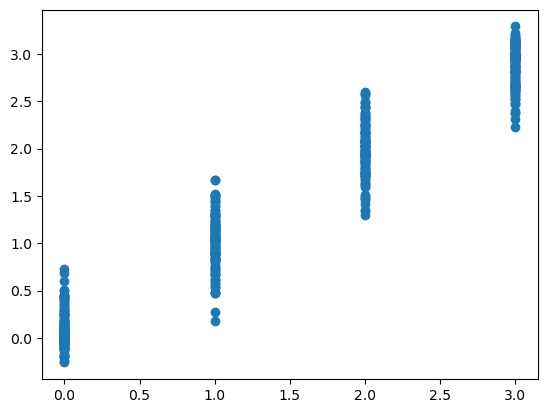

In [42]:
plt.scatter(y_test,y_pred)

In [65]:
df_test=pd.read_csv('test_data.csv')

In [66]:
predicted_price=VR.predict(df_test)

In [67]:
predicted_price

array([ 3.92122908e-01,  2.37167451e+00,  9.29233082e-01,  9.97305236e-01,
        2.45885458e+00,  1.84058843e+00,  4.50099711e-01,  2.53449475e+00,
        1.43575143e+00,  2.93971369e+00,  1.84932099e-01,  2.95325571e+00,
        1.84991769e+00,  1.02202079e-01,  1.26790434e+00,  1.35309037e+00,
       -3.27365853e-02,  3.38371205e-02,  1.23499002e+00,  1.47797736e+00,
        1.15386978e+00,  8.72616051e-02,  2.96066494e+00,  3.01517966e+00,
        1.54727937e+00,  1.05364983e+00,  3.09238063e+00, -1.87136126e-02,
        3.08814401e+00, -1.67179870e-01,  3.19520954e+00,  2.43091079e+00,
        6.48451544e-01,  1.36857407e-01,  1.69167492e-01,  2.84782776e+00,
        1.60973690e+00,  1.69609062e+00,  4.91657293e-01,  1.78354593e-01,
        1.11339671e+00,  5.27245085e-01,  2.18032592e+00,  1.40574506e-01,
       -1.95700939e-02,  1.18846087e+00,  3.59959417e-01,  2.97172818e+00,
        1.45435771e-01,  2.85602897e-01,  2.33377225e+00,  3.06765454e+00,
        1.53009723e+00,  

In [68]:
df_test['price_range']=predicted_price

In [56]:
df_test

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,1445,1,0.5,0,0,0,53,0.7,174,...,386,836,1099,17,1,20,1,0,0,0.392123
1,1,595,0,0.9,1,7,1,23,0.1,121,...,441,810,3752,10,2,18,1,1,0,2.371675
2,2,1131,1,0.5,1,11,0,49,0.6,101,...,658,878,1835,19,13,16,1,1,0,0.929233
3,3,1949,0,2.6,1,4,0,47,0.3,199,...,407,822,1433,11,5,20,0,0,1,0.997305
4,4,956,0,0.5,0,1,1,41,1.0,143,...,511,1075,3286,17,8,12,1,1,0,2.458855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,195,684,1,0.9,1,3,1,63,1.0,157,...,159,1738,3756,17,5,12,1,1,1,2.752541
196,196,1122,0,0.5,0,0,1,40,0.3,156,...,675,1163,1456,9,3,20,1,1,0,0.711826
197,197,1854,0,0.9,1,0,1,33,0.4,195,...,665,718,1675,14,12,9,1,0,1,1.115760
198,198,798,0,0.6,1,6,1,21,0.5,110,...,661,1951,1647,12,2,3,1,0,0,0.977714


In [60]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

0.2553130695697705

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9482799966406835